#Building a generative Adversarial Network from Scratch

                                                                                                     -Gopalakrishna Adusumilli

GAN is a architecture which makes use of multiple nueral networks that compete against each other to make better predictions.

**Generator**, the network responsible for generating new data from training a data

**Discriminator** , Identifies and distinguishes a generated image/fake image from an original image of the training set toghether form a GAN, both these networks learn based on their previous predictions, competing with each other for a better outcome.


![alt text](https://miro.medium.com/max/1400/0*0KQk5Mgi93zax4Hl.png)
GAN can be implemented with the following steps
1. Importing required libraries

2. Building a simple Generator Network

3. Building a simple discriminator

4. Building a GAN by stacking the Generator and Discriminator

5. Plotting the generated images

6. A training method for GAN

7. Loading and processing MNIST data

8. Traininmg the GAN

##step1 Importing Necessary Modules

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense,Dropout,Input,BatchNormalization
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


####the below two code blocks step 2 and step 3 define two diffrent nueral networks. the only major diffrence between the generator and discriminator network are the inputs and outputs####



*   The generator network takes random noise as input and tries to recreate the images from the training set using while the discriminator tries to distinguish the images generated by the generator Network from the actual training Set images.
*   The discriminator is a binary classifier while the Generator generates an output similar to the actual images.



##Step2 Building a simple Generator Network

In [0]:
def build_generator():
  #initializing a nueral network
  generator=Sequential()
  
  #adding an input layer to the network
  
  generator.add(Dense(units=256,input_dim=100))
  
  #activating the layer with LeakyReLu activation function
  
  generator.add(LeakyReLU(0.2))
  
  #applying Batch Normalization
  
  generator.add(BatchNormalization(momentum=0.8))
  
  #adding second layer
  
  generator.add(Dense(units=512))
  
  #adding a third layer
  
  generator.add(Dense(units=1024))
  generator.add(LeakyReLU(0.2))
  
  #the output layer with 784(28x28) nodes
  generator.add(Dense(units=784,activation='tanh'))
  
  #compiling the Generator Network with Loss and optimizer functions
  
  generator.compile(loss='binary_crossentropy',optimizer=keras.optimizers.adam(lr=0.0002,beta_1=0.5))
  return generator

##Step3 Building A Simple Discriminator *Network*

In [0]:
def build_discriminator():
  
  #initializing a nueral network
  discriminator=Sequential()
  
  #adding an Input layer to the network
  discriminator.add(Dense(units=1024,input_dim=784))
  
  #activating the layer with LeakyReLU activation function
  
  discriminator.add(LeakyReLU(0.2))
  
  #adding a dropout layer to reduce overfitting
  discriminator.add(Dropout(0.2))
  
  #adding a second layer
  discriminator.add(Dense(units=512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  #adding a third layer
  
  discriminator.add(Dense(units=256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  #adding a forth layer
  discriminator.add(Dense(units=128))
  discriminator.add(LeakyReLU(0.2))
  
  #adding the output layer with sigmoid activation
  
  discriminator.add(Dense(units=1,activation='sigmoid'))
  
  #compiling the disciminator Network with a loss and optimizer functions
  
  discriminator.compile(loss='binary_crossentropy',optimizer=keras.optimizers.adam(lr=0.0002,beta_1=0.5))
  
  return discriminator
  

## Step 4: Building A GAN Network

*   **This the  method is invoked creates a GAN by stacking the Generator and Discriminator networks**
* **the trainable parameter of the discriminator network when set to false freezes the weights in the discriminator network while the generator network is trained. this prevents the discriminator network from being updated while the generator generates new image from noise**

* **The input shape to the GAN network is the shape of the noise. the noise is fed to the generator and its output is fed to the discriminator which classifies the image as original or generated.**


In [0]:
#stacking the Generator and Discriminator Networks to form a GAN

def gan_net(generator,discriminator):
  
  #setting the trainable parameter of discriminator to false
  
  discriminator.trainable=False
  
  #instantiates a keras tensor of shape 100(Noise shape)
  
  inp=Input(shape=(100,))
  
  #feeds the output from generator(X) to the discriminator and stores the results in out
  
  X=generator(inp)
  
  #feeds the output from generator(X) to the discriminator and stores the results in out
  
  out=discriminator(X)
  
  #creates a model include all layers required in the computation of out given inputs
  
  gan=Model(inputs=inp,outputs=out)
  
  #compiling the GAN Network
  
  gan.compile(loss='binary_crossentropy',optimizer='adam')
  
  return gan


##Step5: Plotting The Generated Images

**The below method generates plots for the images created by the generator from the normally distributed noise input**

In [0]:
#method to plot the images

def plot_images(epoch,generator,dim=(10,10),figsize=(10,10)):
  
  #generate a normally distributed noise of shape (100x100)
  
  noise=np.random.normal(loc=0,scale=1,size=[100,100])
  
  #generate an image for the input noise
  
  generated_images=generator.predict(noise)
  
  #reshape the generated image
  generated_images=generated_images.reshape(100,28,28)
  
  #plot the image
  plt.figure(figsize=figsize)
  
  #plot for each pixel
  
  for i in range(generated_images.shape[0]):
    plt.subplot(dim[0],dim[1],i+1)
    plt.imshow(generated_images[i],cmap='gray',interpolation='nearest')
    plt.axis('off')
    plt.tight_layout()

## Step 6 Method For Training

In [0]:
#Training method with training set, default epoch and default batch_size as arguments.

def train(X_train, epochs=5, batch_size=128):
  
  #initializing the GAN
  generator=build_generator()
  discriminator=build_discriminator()
  gan=gan_net(generator,discriminator)
  
  #training the model for specified epochs
  
  for epoch in range(1,epochs+1):
    print("###### @ Epoch",epoch)
    
    #tqdm module helps to generate a status bar for training
    for _ in tqdm(range(batch_size)):
      
      #random noise with size batch_sizex100
      noise=np.random.normal(0,1,[batch_size,100])
      
      #generating images from noise
      
      generated_images=generator.predict(noise)
      
      #taking random images from the training
      
      image_batch=X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
      
      #creating a new training set with real and fake images
      
      X=np.concatenate([image_batch,generated_images])
      
      #labels for generated and real data
      y_dis=np.zeros(2*batch_size)
      #label for real images
      y_dis[:batch_size]=1.0
      
      #training the discrminator with real and generated images
      discriminator.trainable=True
      discriminator.train_on_batch(X,y_dis)
      
      #labelling the generated images a sreal images(1) to trick the discriminator
      
      noise=np.random.normal(0,1,[batch_size,100])
      y_gen=np.ones(batch_size)
      
      #freezing the weights of the discriminant or while training generator
      
      discriminator.trainable=False
      
      #training the gan network
      
      gan.train_on_batch(noise,y_gen)
      
      #plotting the images for every 10 epoch
      if epoch==1 or epoch %10==0:
        plot_images(epoch,generator,dim=(10,10),figsize=(15,15))
        
      
     
    

## Step 7 Loading and Processing MNIST Data

In [0]:
#Unpacking the training data from mnist dataset
(X_train,_),(_,_)=mnist.load_data()

#converting to float type and normalizing the data

X_train=(X_train.astype(np.float32)-127.5)/127.5

#convert shape of X_train from (60000,28,28) to (60000, 784) -784 coloumns per row

X_train=X_train.reshape(60000,784)

11493376/11490434 [==============================] - 2s 0us/step


##Step 8 Training the GAN


W0814 11:38:19.776296 140570468841344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 11:38:19.812689 140570468841344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 11:38:19.818312 140570468841344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 11:38:19.906702 140570468841344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0814 11:38:19.976095 

###### @ Epoch 1


 16%|█▌        | 20/128 [16:18<1:28:01, 48.91s/it]/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
  4%|▍         | 5/128 [00:00<00:02, 49.35it/s]

###### @ Epoch 2


  5%|▌         | 7/128 [00:00<00:01, 64.74it/s]

###### @ Epoch 3


  5%|▌         | 7/128 [00:00<00:01, 64.85it/s]

###### @ Epoch 4


  5%|▌         | 7/128 [00:00<00:01, 68.28it/s]

###### @ Epoch 5


100%|██████████| 128/128 [00:01<00:00, 65.32it/s]


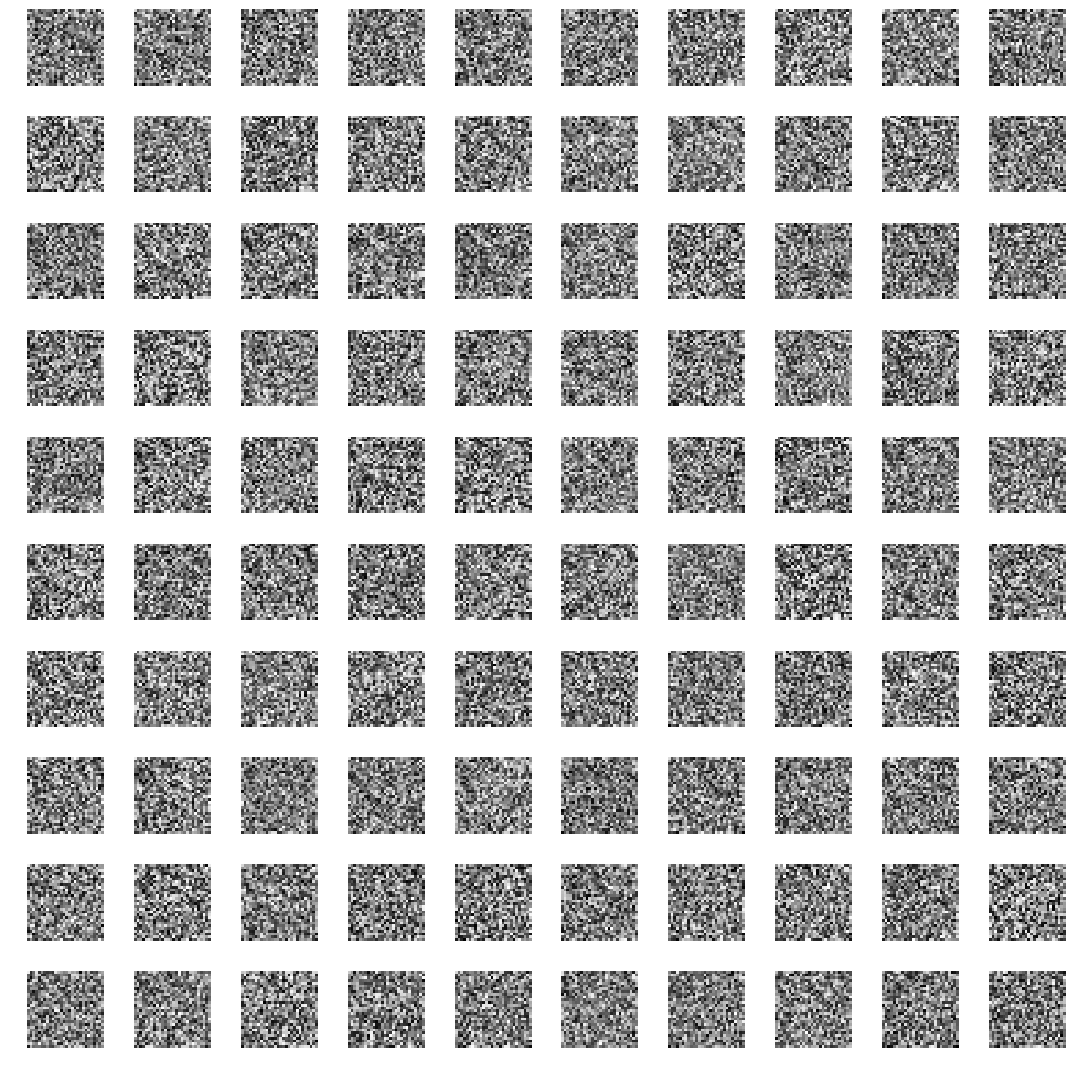

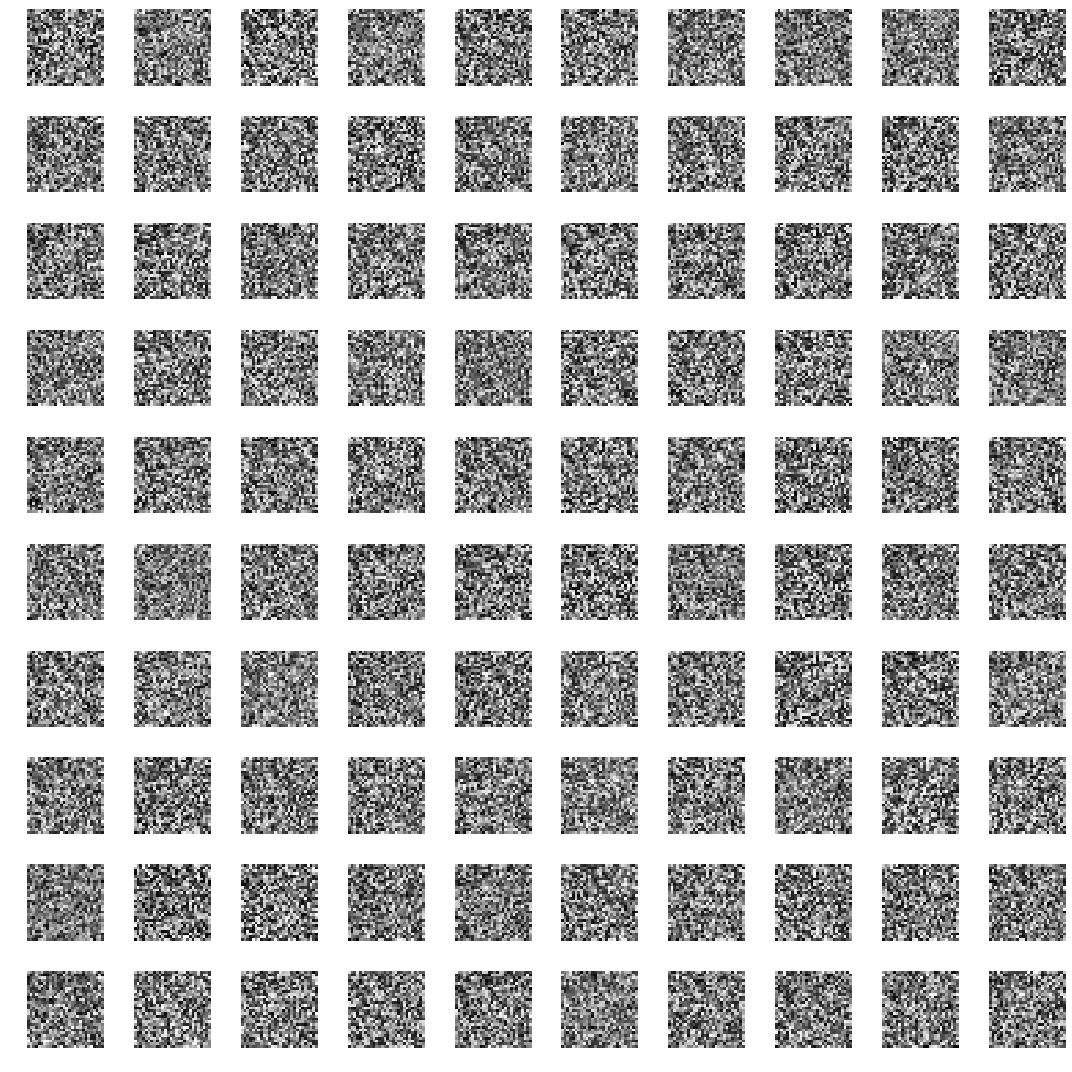

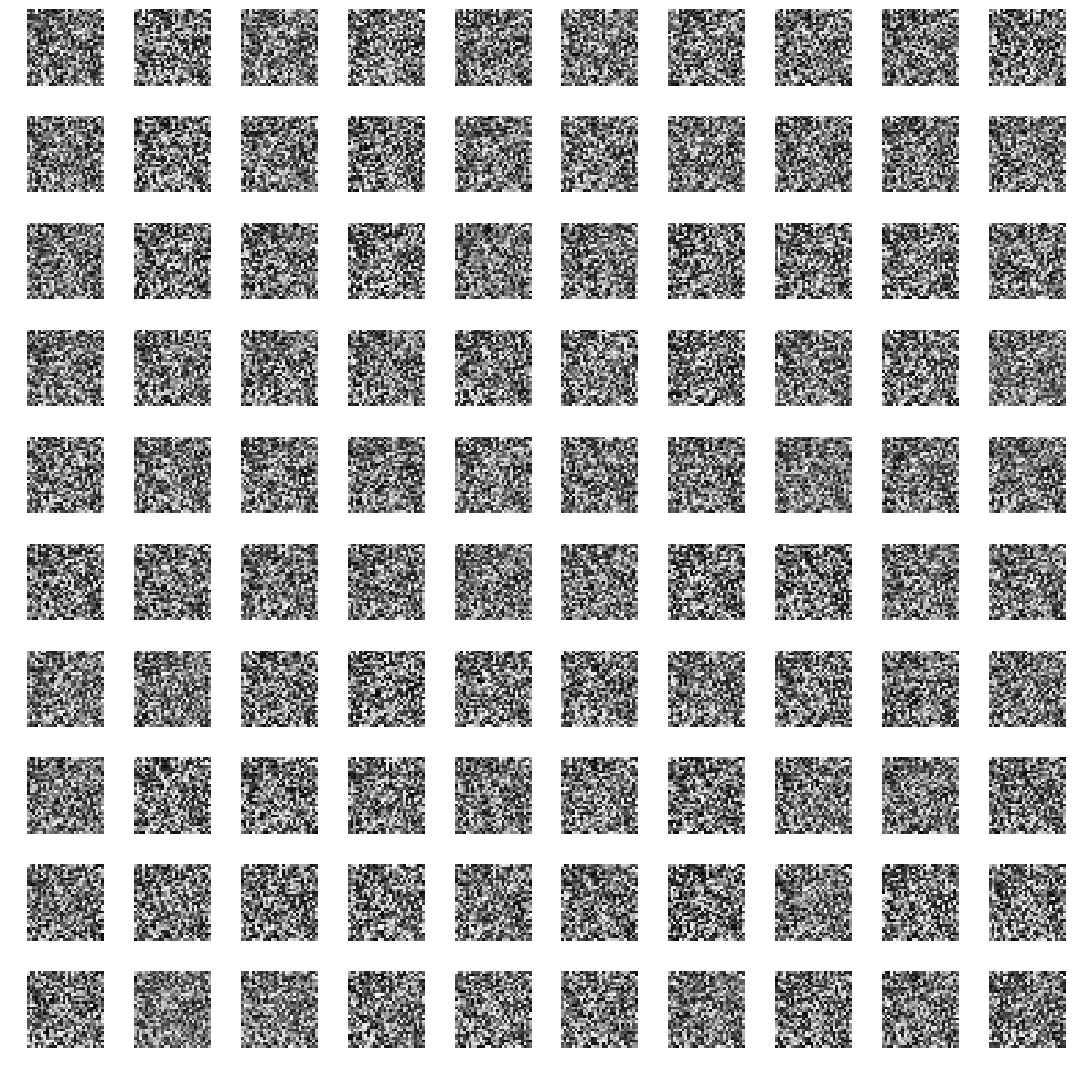

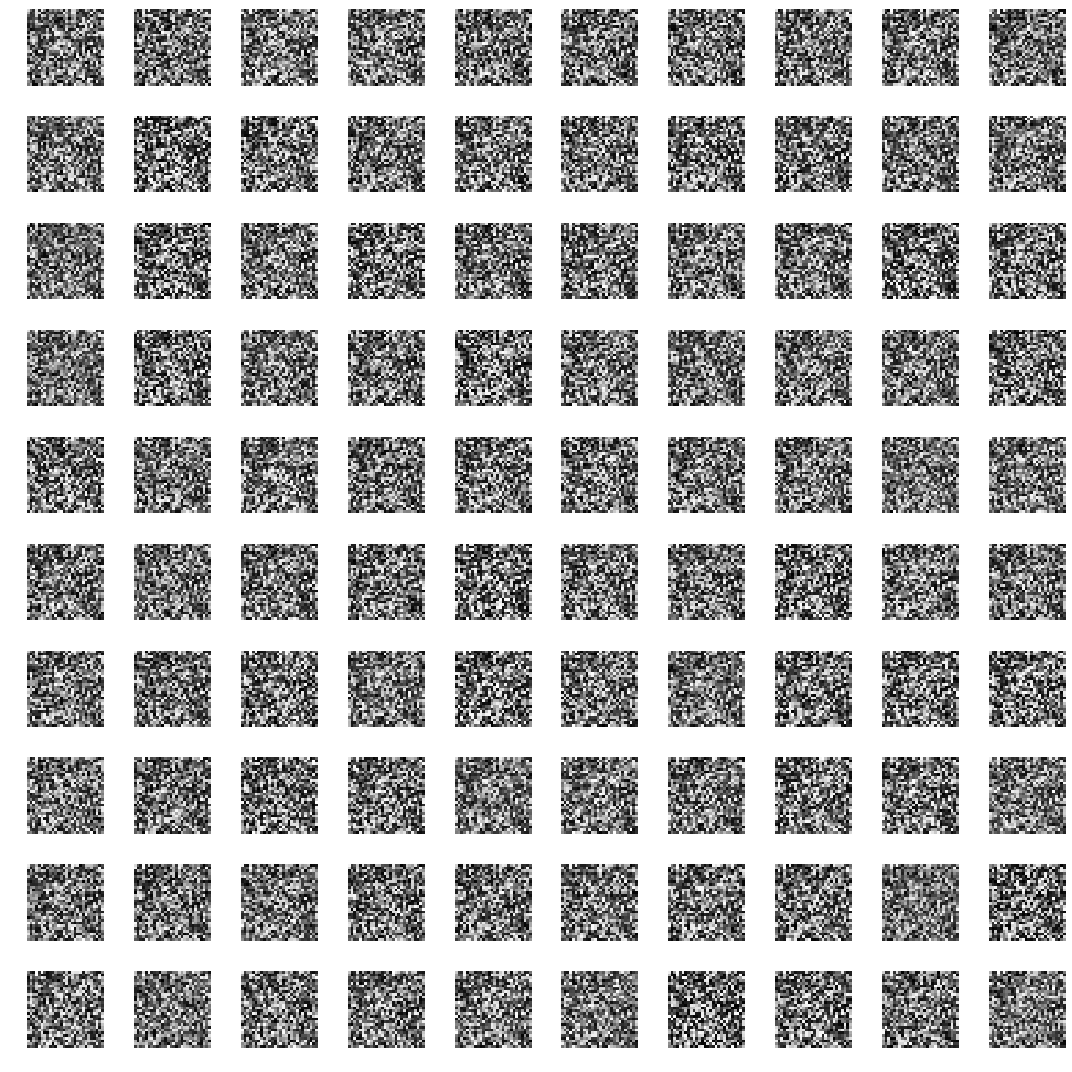

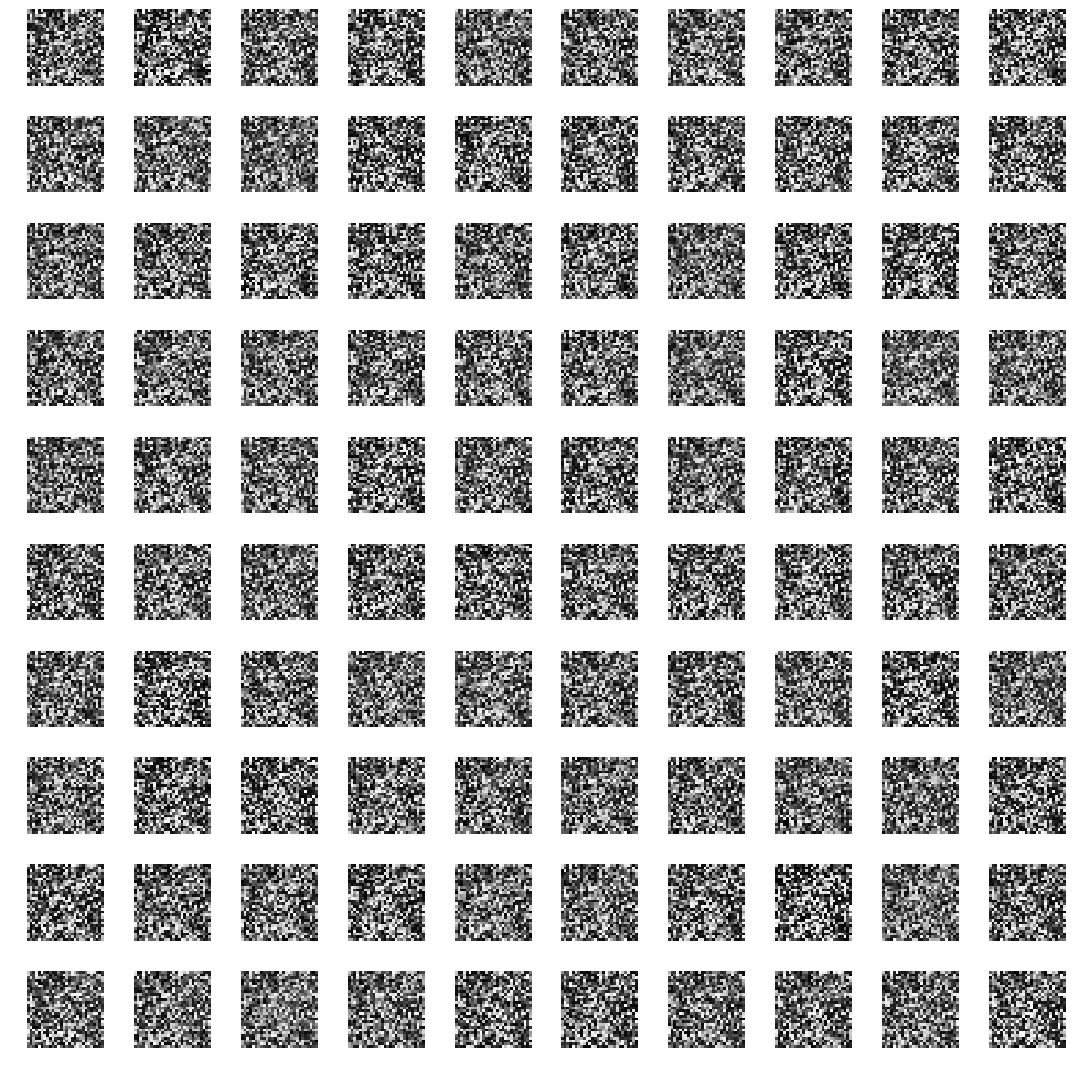

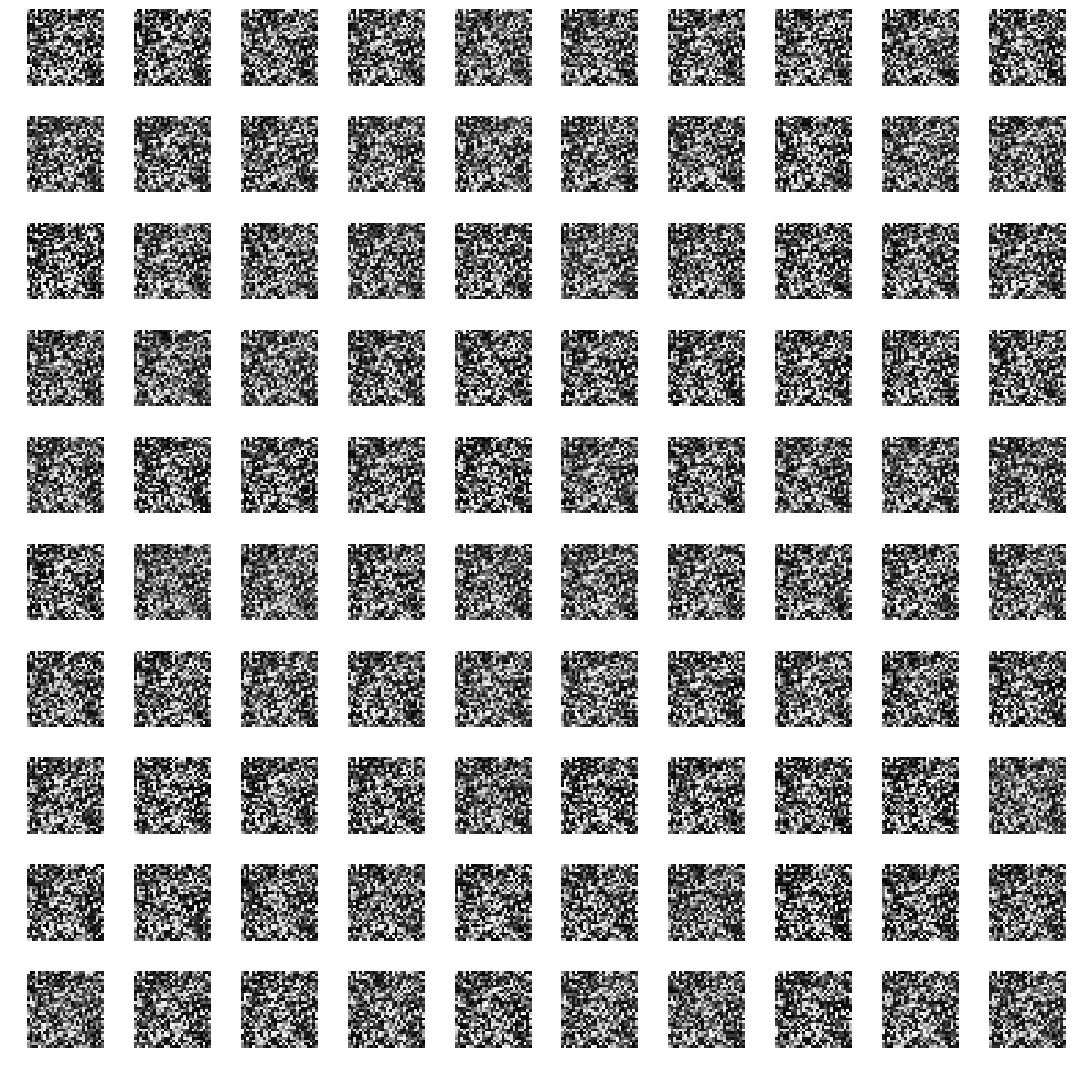

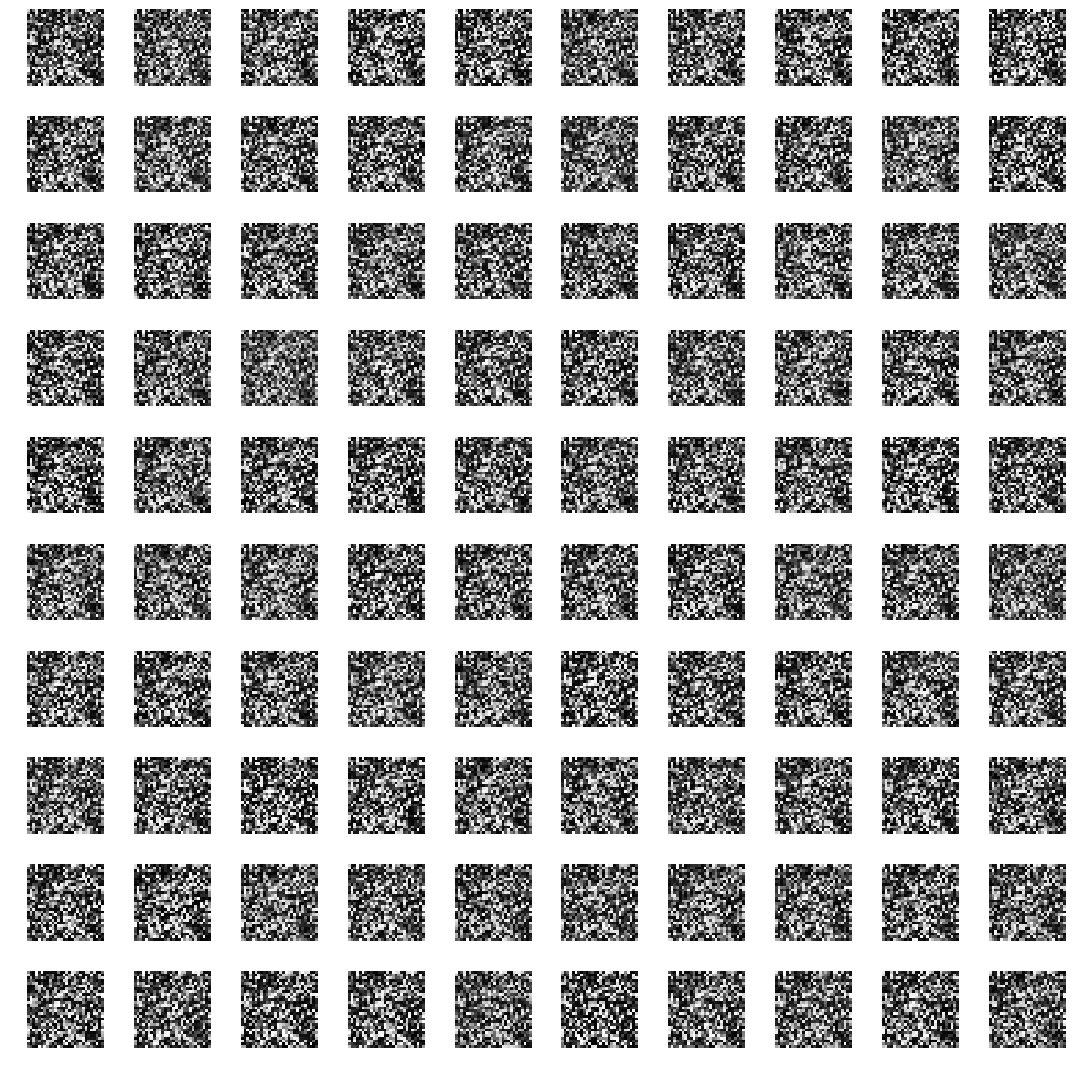

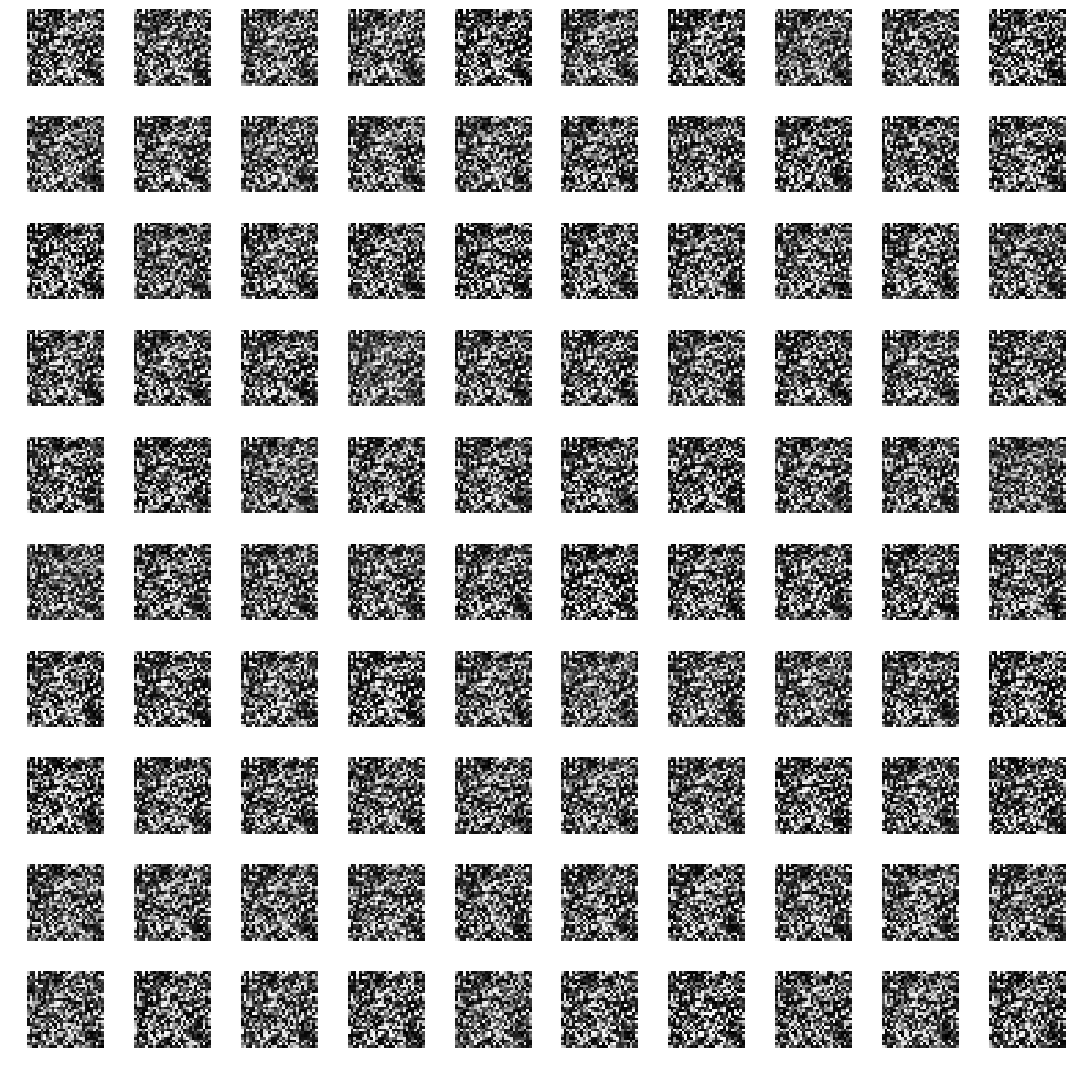

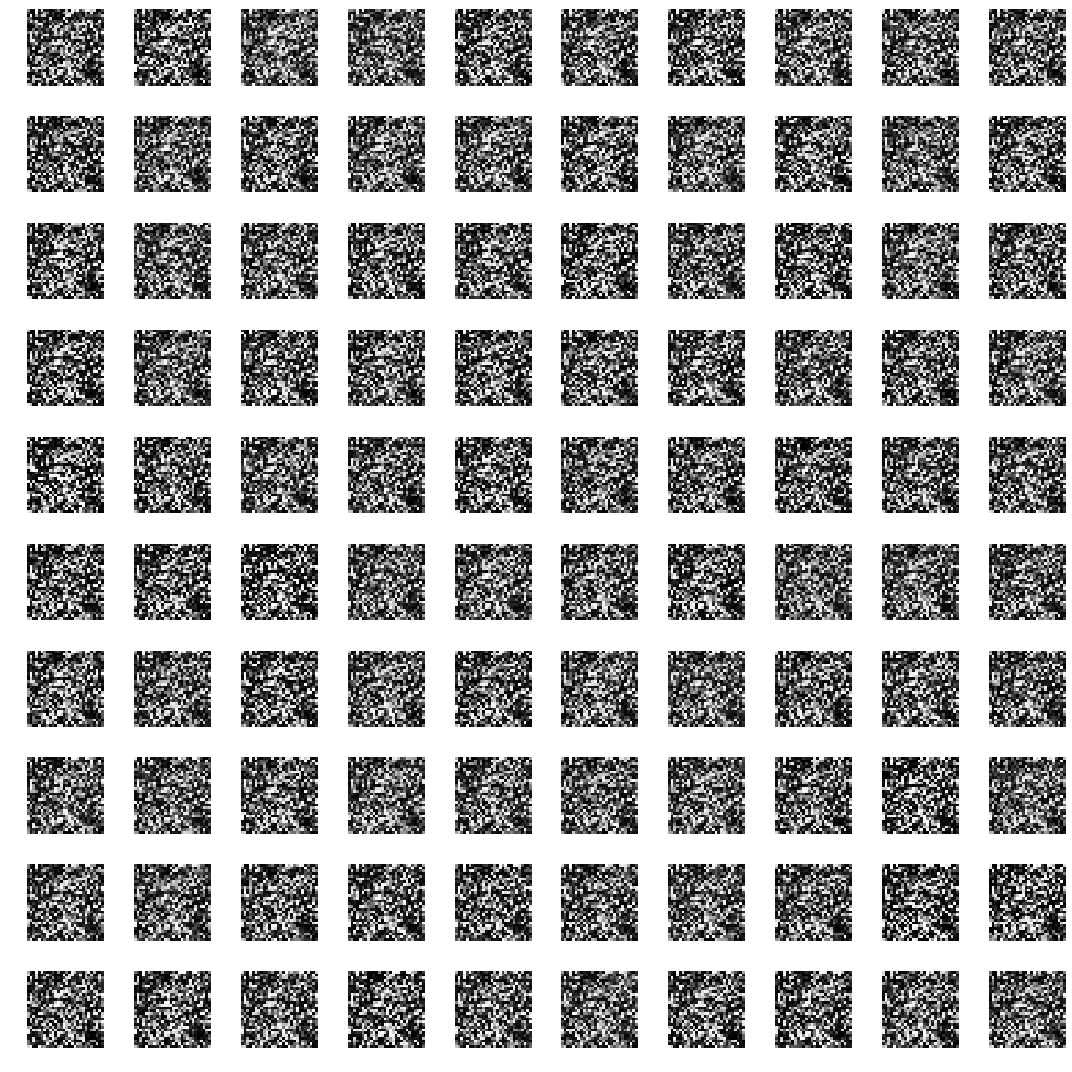

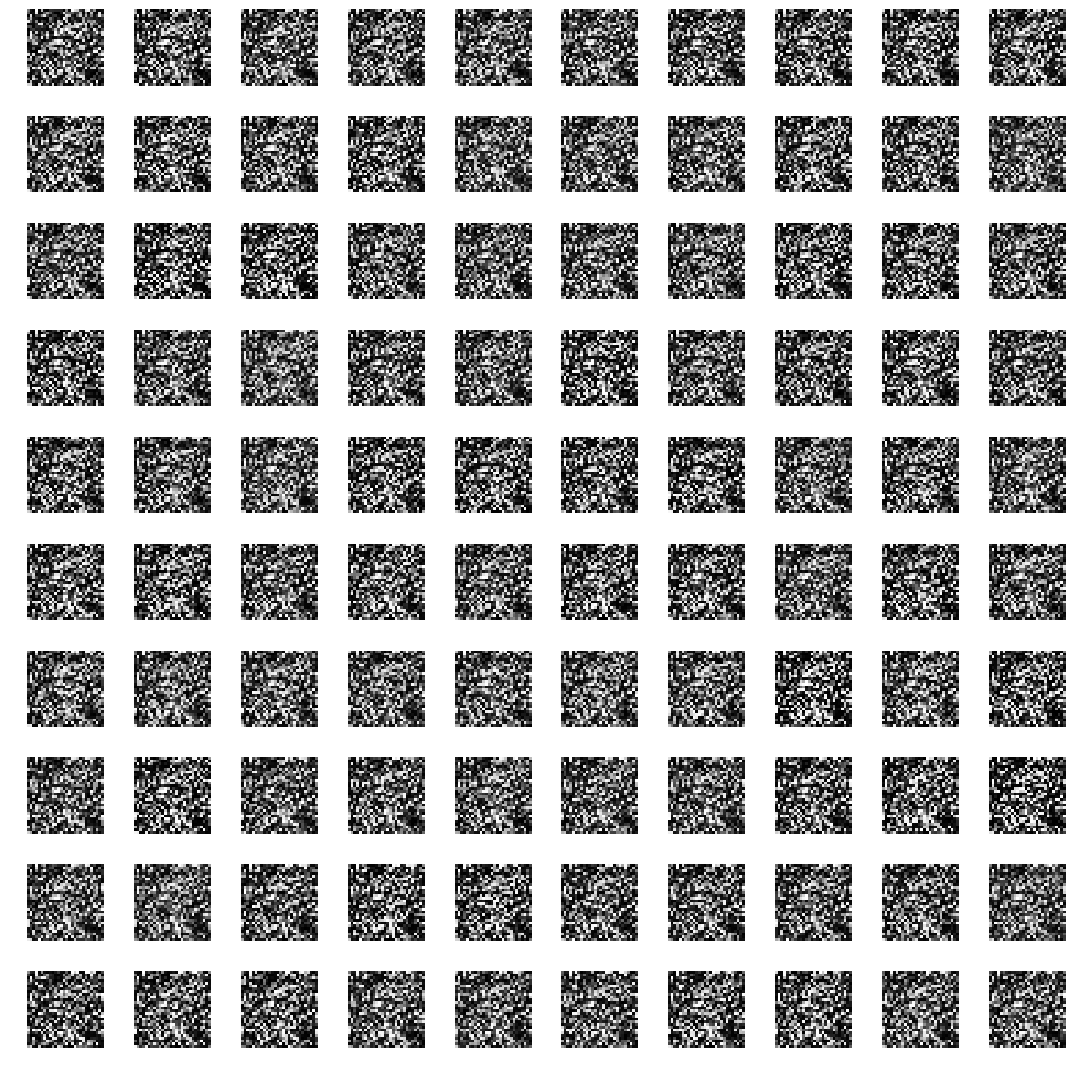

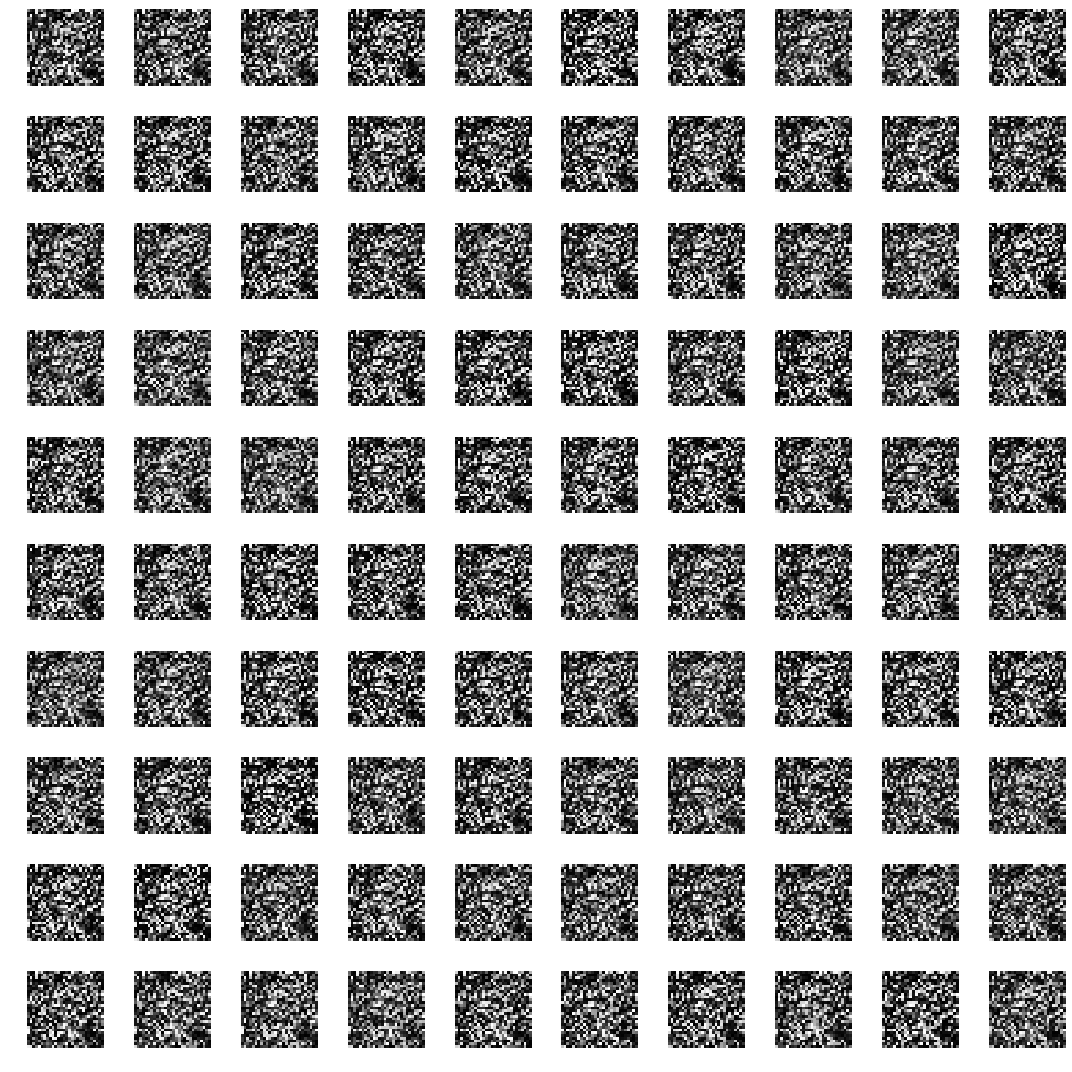

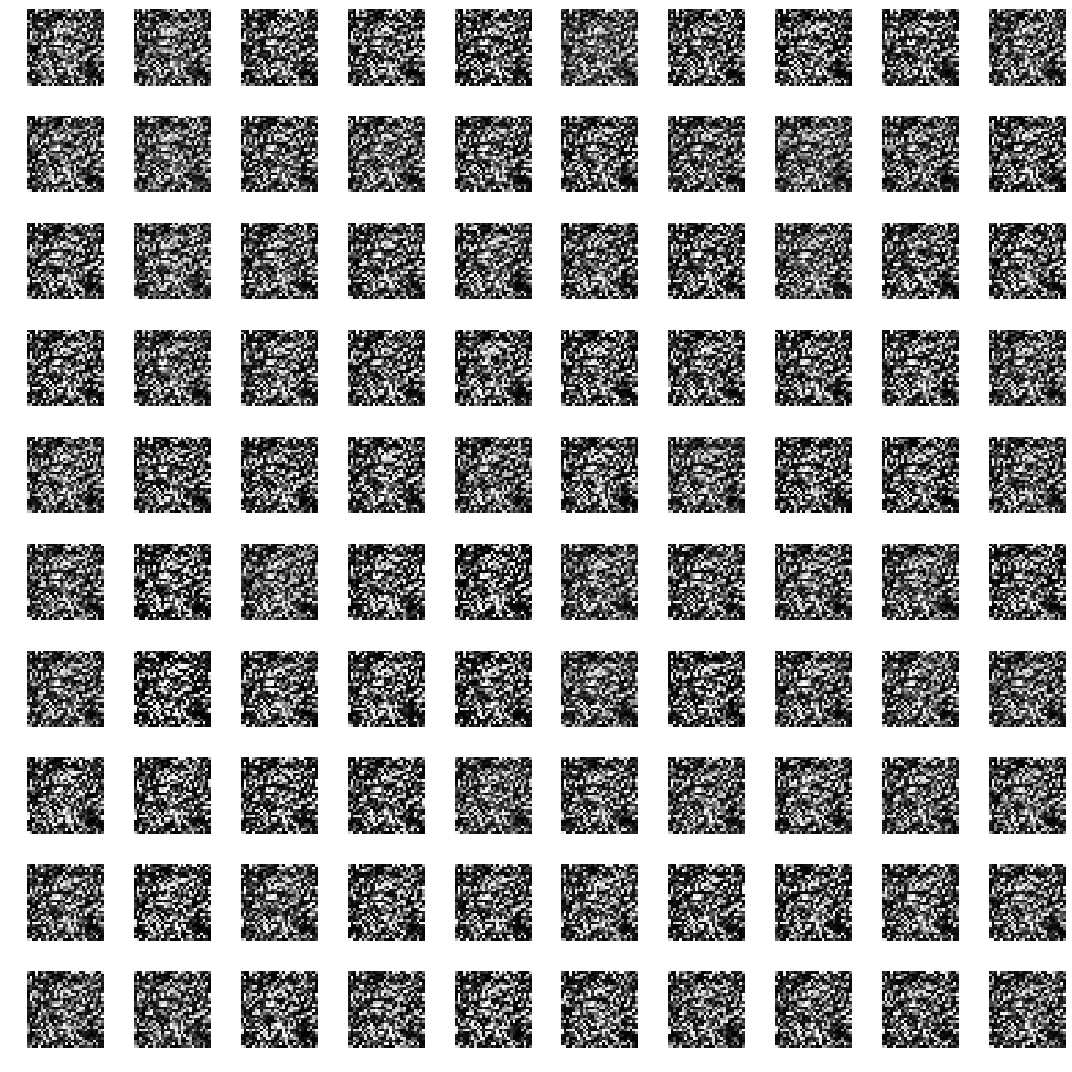

In [0]:
train(X_train,epochs=5,batch_size=128)